In [4]:
import pandas as pd
import numpy as np
import plotly_express as px

In [91]:
df1 = pd.read_csv('./DAT_ASCII_EURUSD_M1_2018.csv', 
                  names=['data', 'open', 'max', 'low', 'close', 'volume'], 
                  sep=';')

df1['data'] = pd.to_datetime(df1['data'])

df1.head(3)

,data,open,max,low,close,volume
0,2018-01-01 17:00:00,1.20037,1.20100,1.20037,1.20100,0
1,2018-01-01 17:01:00,1.20083,1.20095,1.20017,1.20030,0
2,2018-01-01 17:02:00,1.20035,1.20043,1.20035,1.20043,0


In [43]:
df1.columns

Index(['data', 'open', 'max', 'low', 'close', 'volume'], dtype='object')

In [44]:
df1.dtypes

data      datetime64[ns]
open             float64
max              float64
low              float64
close            float64
volume             int64
dtype: object

In [45]:
df1.isna().sum()

data      0
open      0
max       0
low       0
close     0
volume    0
dtype: int64

In [46]:
df1.shape

(372607, 6)

In [51]:
df1['max'].max() - df1['low'].min()

0.13396000000000008

In [89]:
def upOrDown(row):
    if (row[4] - row[1]) > 0:
        return 1
    
    return 0

In [82]:
df1['day'] = df1['data'].apply(lambda row: row.day)
df1['day_w'] = df1['data'].apply(lambda row: row.dayofweek)
df1['month'] = df1['data'].apply(lambda row: row.month)
df1['hour'] = df1['data'].apply(lambda row: row.hour)
df1['minute'] = df1['data'].apply(lambda row: row.minute)

In [96]:
df1['high'] = df1.apply(upOrDown, axis=1)
df1['high'] = df1['high'].astype('category')

In [105]:
df1.groupby(by='high').agg(['mean', 'std'])

open                 max                 low               close  \
          mean       std      mean       std      mean       std      mean   
high                                                                         
0     1.181084  0.036797  1.181117  0.036799  1.180952  0.036789  1.180991   
1     1.181368  0.036957  1.181509  0.036966  1.181334  0.036955  1.181471   

               volume       
           std   mean  std  
high                        
0     0.036791      0  0.0  
1     0.036963      0  0.0

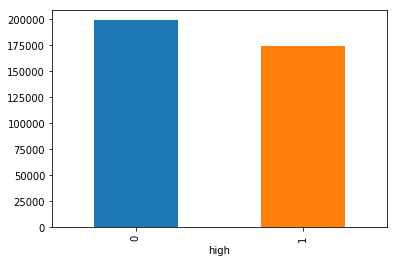

In [118]:
df1.groupby('high').agg('count')['data'].plot(kind='bar')